In [26]:
import sqlite3
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [11]:
%sql sqlite:///SQLiteMagic.db

In [12]:
import csv, sqlite3
con = sqlite3.connect("SQLiteMagic.db")
cur = con.cursor()

In [13]:
df1=pd.read_csv('/content/jcxq-k9xf.csv')

In [14]:
df1.to_sql('chicago_socieocnomic_data',con,if_exists='replace',index=False,method='multi')

78

In [15]:
df1

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


In [16]:
%sql select * from chicago_socieocnomic_data limit 5;

 * sqlite:///SQLiteMagic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## problem 1
How many rows are in the dataset?

In [17]:
%sql select count(*) from chicago_socieocnomic_data;

 * sqlite:///SQLiteMagic.db
Done.


count(*)
78


## Problem 2
How many community areas in chicago have a  hardership index greater than 50.0?

In [24]:
%sql select count(*)community_area_name from chicago_socieocnomic_data where hardship_index>50.0;

 * sqlite:///SQLiteMagic.db
Done.


community_area_name
38


## problem 3
what maximunm value of headership index in dataset?

In [20]:
%sql select max (hardship_index) from chicago_socieocnomic_data ;

 * sqlite:///SQLiteMagic.db
Done.


max (hardship_index)
98.0


## problem 4
which community area which has the highest hardeship index?

In [21]:
%sql select max (hardship_index) , 	community_area_name from chicago_socieocnomic_data ;

 * sqlite:///SQLiteMagic.db
Done.


max (hardship_index),community_area_name
98.0,Riverdale


## Problem 5
Which chicago community areas have per-capita incomes greater than $60,000

In [25]:
%sql select community_area_name from chicago_socieocnomic_data where per_capita_income_>60000;

 * sqlite:///SQLiteMagic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


## Problem 6
Create a scatter ploot using the variables per_capita_income_ and hardship_index.
Exaplain the correlation between the two variables.

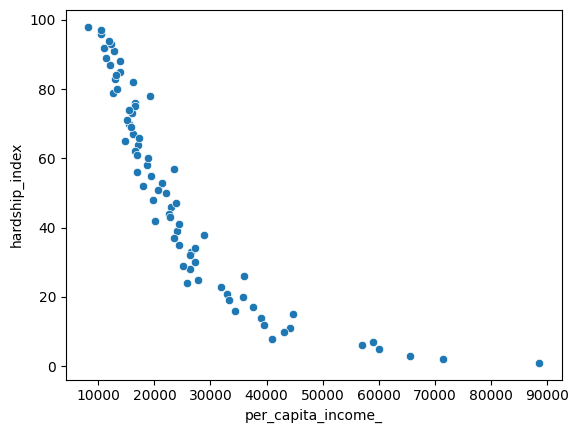

In [27]:
Scattaer_plot = sns.scatterplot(x='per_capita_income_', y='hardship_index', data=df1)